<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Derivation for simple linear regression


---

To minimize the residual sum of squares, we will have to calculate its partial derivatives with respect to $\beta_0$ and $\beta_1$ respectively and set each of them to zero.

To calculate the partial derivatives, we can use python's `sympy` package:

In [1]:
import sympy as sym
from sympy import init_session, init_printing

init_printing()
sym.symbols('x x_i y_i beta_0 beta_1 n')

### Sympy readily calculates derivatives of functions which might cost you some fatigue to do by hand.

In [2]:
sym.diff('x**2','x')

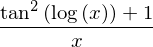

In [3]:
sym.diff('tan(log(x))','x')

### We want to minimize the residual sum of squares:

$$RSS = \sum_{i=1}^n(y_i-(\beta_0+\beta_1 x_i))^2$$

### We do this by taking derivatives with respect to the beta-coefficients. These have the same form for each term in the sum:

In [4]:
print('Partial derivative with respect to beta_0:')
sym.together(sym.diff('(y_i-(beta_0+beta_1*x_i))**2','beta_0'))

Partial derivative with respect to beta_0:


In [5]:
print('Partial derivative with respect to beta_1:')
sym.together(sym.diff('(y_i-(beta_0+beta_1*x_i))**2','beta_1'))

Partial derivative with respect to beta_1:


### The partial derivative with respect to $\beta_0$:

$$\frac{\partial RSS}{\partial\beta_0} = -2\sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)}$$

### The partial derivative with respect to $\beta_1$:

$$\frac{\partial RSS}{\partial\beta_1} = -2\sum_{i=1}^n{x_i\left(y_i - (\beta_0 + \beta_1x_i)\right)}$$

### To find the minimum, we set each of these derivatives to zero.

#### For the first equation, we obtain

$$
\begin{eqnarray*}
0 &=& \sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)}\\
0 &=& \sum_{i=1}^n y_i - \sum_{i=1}^n \beta_0 -\sum_{i=1}^n \beta_1 x_i\\
0 &=& \sum_{i=1}^n y_i - \beta_0\sum_{i=1}^n 1  -\beta_1\sum_{i=1}^n x_i\\
0 &=& n\, \bar{y} - n\, \beta_0 - n \,\beta_1 \bar{x}\\
0 &=& n\left( \bar{y} - \beta_0 - \beta_1 \bar{x}\right)\\
0 &=& \bar{y} - \beta_0 - \beta_1 \bar{x}
\end{eqnarray*}
$$

and hence

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

#### Inserting this result into the equation for  $$\frac{\partial RSS}{\partial\beta_1}$$ gives

$$
\begin{eqnarray*}
0 &=& \sum_{i=1}^n x_i\left(y_i-\bar{y}+\beta_1 \bar{x}- \beta_1 x_i\right)\\
0 &=& \sum_{i=1}^n x_i y_i-\sum_{i=1}^n x_i\bar{y}+\sum_{i=1}^n\beta_1 x_i\bar{x}-\sum_{i=1}^n \beta_1 x_i^2 \\
0 &=& \sum_{i=1}^n x_i y_i -\bar{y}\sum_{i=1}^n x_i 
+ \beta_1\left(\bar{x}\sum_{i=1}^n x_i-\sum_{i=1}^n x_i^2\right)\\
0 &=& n\,\overline{x y}-n\,\bar{x}\bar{y}+\beta_1(n\,\bar{x}^2-n\,\overline{x^2})\\
0 &=& n\left(\overline{x y}-\bar{x}\bar{y}+\beta_1(\bar{x}^2-\overline{x^2})\right)\\
0 &=& \overline{x y}-\bar{x}\bar{y}+\beta_1(\bar{x}^2-\overline{x^2})
\end{eqnarray*}
$$

which gives 

$$
\beta_1 = \frac{\overline{x y}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2}
$$

### Further conclusions 

In the above calculations we obtained the model coefficients. The two partial derivatives allow us to take two further conclusions.

Remember that the residuals are given by

$$\epsilon_i=y_i - (\beta_0 + \beta_1x_i)$$

Hence we can write the partial derivative with respect to $\beta_0$ as

$$\frac{\partial RSS}{\partial\beta_0} = -2\sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)} 
= -2\sum_{i=1}^n{\epsilon_i}  =0 $$

This implies that **the sum of the residuals equals zero, and therefore also their mean is zero**.

The partial derivative with respect to $\beta_1$ we can write as

$$\frac{\partial RSS}{\partial\beta_1} = -2\sum_{i=1}^n{x_i\left(y_i - (\beta_0 + \beta_1x_i)\right)} = -2\sum_{i=1}^n{x_i\epsilon_i} = 0$$

This implies that **the scalar product between the vectors of $X$ and $\epsilon$ is zero**, they are orthogonal to each other.

In [8]:
import numpy as np
random_data = np.random.randint(1, 7, 10000)
print (random_data.mean())   # 打印平均值
print (random_data.std() )   # 打印标准差


3.4953
1.7061588173438018


In [3]:
random_data.mean()

3.4961

In [4]:
random_data.std()

1.696108719982301

In [5]:
sample1 = []
for i in range(0, 10):
    sample1.append(random_data[int(np.random.random() * len(random_data))])

In [7]:
print( sample1)

[2, 4, 2, 4, 2, 2, 2, 1, 6, 5]


In [10]:
np.array(sample1).mean()

3.0

In [11]:
np.array(sample1).std()

1.5491933384829668

In [13]:
type(sample1)

list

In [18]:
samples = []
samples_mean = []
samples_std = []
 
for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * len(random_data))])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)
 
    samples_mean_np = np.array(samples_mean)
    samples_std_np = np.array(samples_std)
 
print (samples_mean_np)

[3.24 3.42 3.62 3.5  3.4  3.52 3.44 3.4  3.5  3.64 3.26 3.36 3.84 3.34
 3.78 3.34 3.52 3.68 3.7  3.42 3.66 3.28 3.32 3.26 3.52 3.44 3.38 3.3
 3.8  3.62 3.64 3.44 3.4  3.26 3.78 3.56 3.72 3.46 3.36 3.68 3.66 3.76
 3.38 3.92 3.28 3.2  3.4  3.22 3.38 3.6  3.44 3.14 3.46 3.24 3.52 3.14
 3.74 3.66 3.72 3.9  3.46 3.62 3.66 3.38 3.78 3.32 3.32 3.02 3.48 3.26
 3.44 3.8  3.94 3.18 3.58 3.42 3.42 3.48 3.72 3.46 3.46 3.28 3.4  3.7
 3.56 3.26 3.32 3.04 3.32 3.6  3.66 3.76 3.48 3.22 3.22 3.26 3.2  3.44
 3.28 3.44 3.1  3.8  3.34 3.08 2.76 3.46 3.54 3.06 3.56 3.5  3.76 3.64
 3.76 3.8  3.92 3.52 3.5  3.44 3.78 3.56 3.66 3.66 3.14 2.9  3.8  3.1
 3.18 3.62 3.4  3.2  3.58 3.16 3.82 3.72 3.62 3.56 3.2  3.38 3.7  3.74
 3.66 3.54 3.08 3.54 3.46 3.36 3.9  3.82 3.5  3.5  3.48 3.78 3.64 3.74
 3.36 3.58 3.56 3.76 3.84 3.7  3.52 3.38 2.94 3.38 3.16 3.5  3.28 3.5
 3.72 3.6  3.04 3.3  3.34 3.08 3.48 3.32 3.72 3.54 3.4  3.42 3.62 3.04
 3.24 3.7  3.24 3.5  3.42 3.48 3.6  3.8  3.24 3.46 3.18 3.42 3.16 3.66
 3.44 3.38

In [19]:
samples_mean_np.mean()

3.4881599999999997